# 0. Code Library and Links

https://rstudio.github.io/keras/

https://cran.r-project.org/web/packages/kerasR/vignettes/introduction.html

http://machinelearningmastery.com/machine-learning-datasets-in-r/

https://archive.ics.uci.edu/ml/datasets.html

## Installation
***rstudio/keras***

In [10]:
# install.packages("Rcpp")

In [11]:
# install.packages("devtools")

In [12]:
# devtools::install_github("rstudio/reticulate", force=TRUE)

In [13]:
# devtools::install_github("r-lib/processx")

In [1]:
library(processx)

In [2]:
# devtools::install_github("rstudio/tensorflow", force=TRUE)

In [3]:
# devtools::install_github("rstudio/keras")

In [2]:
library(keras)

In [5]:
# install_tensorflow()

## Additional Resources

In [3]:
library(repr)
library(readr)

In [6]:
library(caret)

In [7]:
library(mlbench)

In [43]:
# names of datasets
# data()

In [ ]:
# r color names 
# colors()

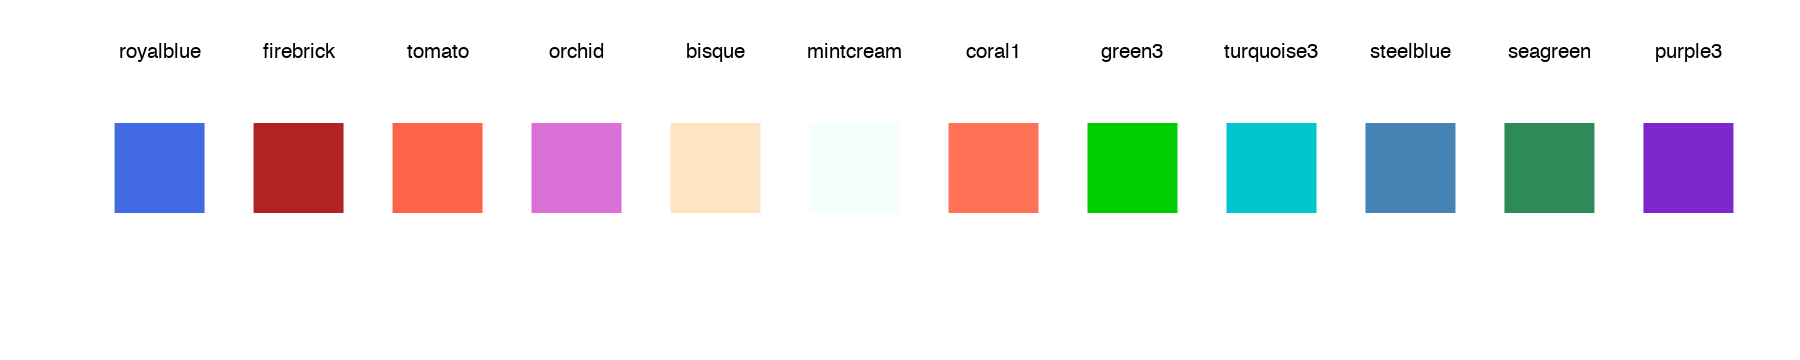

In [8]:
col.lst <- c("royalblue", "firebrick", "tomato", "orchid", "bisque", "mintcream", 
             "coral1", "green3", "turquoise3", "steelblue", "seagreen", "purple3")
             
options(repr.plot.width=15, repr.plot.height=3)            
             
plot(1:12, rep(1,12), axes = FALSE, pch=15, cex=10, col=col.lst, xlab=NA, ylab=NA, xlim = c(1, 12))
axis(1, at=1:12, labels = sprintf("%s", col.lst), col="white", cex=0.5, padj=-15)

In [9]:
crimson <- rgb(220/255, 20/255, 60/255)
persian_blue <- rgb(28/255, 57/255, 187/255)

In [290]:
binary_to_integer <- function(x) {packBits(rev(c(rep(FALSE, 32-length(x)%%32), as.logical(x))), "integer")}

In [291]:
binary_to_integer(c(0,0,1,1,1,1))

[1] 15

# 1. Data Samples

In [10]:
# Boston Housing Data; Regression; keras
boston <- dataset_boston_housing(path = "boston_housing.npz", seed = 113L, test_split = 0.2)

In [11]:
x_train5 <- boston$train$x
x_test5 <- boston$test$x

y_train5 <- boston$train$y
y_test5 <- boston$test$y

In [12]:
dim(x_train5)

[1] 404  13

In [782]:
# Boston Housing Data; Regression; mlbench
data(BostonHousing)
head(BostonHousing)

crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [783]:
dim(BostonHousing)

[1] 506  14

In [784]:
intrain3 <- createDataPartition(y=BostonHousing$medv, p=0.8, list=FALSE)

x_train3 <- as.matrix(BostonHousing[intrain3, -14])
x_test3 <- as.matrix(BostonHousing[-intrain3, -14])

y_train3 <- BostonHousing$medv[intrain3]
y_test3  <- BostonHousing$medv[-intrain3]

In [785]:
dim(x_train3)

[1] 407  13

In [786]:
class(y_train3)

[1] "numeric"

In [124]:
# Pima Indians Diabetes Database; Binary Classification; mlbench
data(PimaIndiansDiabetes)
head(PimaIndiansDiabetes, 3)

pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
6,148,72,35,0,33.6,0.627,50,pos
1,85,66,29,0,26.6,0.351,31,neg
8,183,64,0,0,23.3,0.672,32,pos


In [125]:
dim(PimaIndiansDiabetes)

[1] 768   9

In [126]:
intrain4 <- createDataPartition(y=PimaIndiansDiabetes$diabetes, p=0.8, list=FALSE)

x_train4 <- as.matrix(PimaIndiansDiabetes[intrain4, -9])
x_test4 <- as.matrix(PimaIndiansDiabetes[-intrain4, -9])

y_train4 <- as.integer(PimaIndiansDiabetes$diabetes[intrain4])
y_test4  <- as.integer(PimaIndiansDiabetes$diabetes[-intrain4])

In [127]:
dim(x_train4)

[1] 615   8

In [128]:
class(x_train4)

[1] "matrix"

In [129]:
class(y_train4)

[1] "integer"

In [130]:
# one-hot encode
y_train4_cat <- to_categorical(y_train4)
y_test4_cat <- to_categorical(y_test4)

In [52]:
# binary encode 
# y_train4 <- replace(y_train4, y_train4==1, 0)
# y_train4 <- replace(y_train4, y_train4==2, 1)
# y_test4 <- replace(y_test4, y_test4==1, 0)
# y_test4 <- replace(y_test4, y_test4==2, 1)

In [53]:
# Digit Database; Multi-Class Classification; kaggle.com
train <- read_csv("digit_train.csv")
test <- read_csv("digit_test.csv")

Parsed with column specification:
cols(
  .default = col_integer()
)
See spec(...) for full column specifications.
Parsed with column specification:
cols(
  .default = col_integer()
)
See spec(...) for full column specifications.


In [54]:
head(train[, 1:14], 3)

label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12
1,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [55]:
prop.table(table(train$label))*100


        0         1         2         3         4         5         6         7 
 9.838095 11.152381  9.945238 10.359524  9.695238  9.035714  9.850000 10.478571 
        8         9 
 9.673810  9.971429 

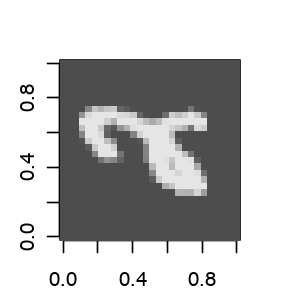

In [56]:
img = matrix(unlist(train[200,-1]), nrow = 28, byrow = T)

options(repr.plot.width=2.5, repr.plot.height=2.5)
par(pin=c(1.5, 1.5))

image(img, col=gray.colors(255))

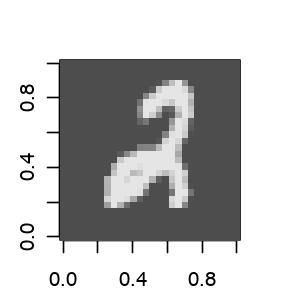

In [57]:
rotate <- function(x) t(apply(x, 2, rev)) 

options(repr.plot.width=2.5, repr.plot.height=2.5)
par(pin=c(1.5,1.5))
    
image(rotate(img), col=gray.colors(255))

In [58]:
train$label <- factor(train$label)

intrain <- createDataPartition(y=train$label, p=0.8, list=FALSE)

x_train <- train[intrain, -1]
x_test <- train[-intrain, -1]

y_train_labels <- train$label[intrain]
y_test_labels  <- train$label[-intrain]

x_train <- as.matrix(x_train)
x_test <- as.matrix(x_test)

y_train_labels  <- as.integer(as.character(y_train_labels))
y_test_labels  <- as.integer(as.character(y_test_labels))

In [59]:
dim(x_train)

[1] 33604   784

In [60]:
dim(x_test)

[1] 8396  784

In [61]:
class(x_train)

[1] "matrix"

In [62]:
class(y_train_labels)

[1] "integer"

In [63]:
# rescale
x_train <- x_train / 255
x_test <- x_test / 255

In [64]:
# one-hot encode
y_train <- to_categorical(y_train_labels, 10)
y_test <- to_categorical(y_test_labels, 10)

In [65]:
dim(y_train)

[1] 33604    10

In [66]:
dim(y_test)

[1] 8396   10

In [20]:
# ?dataset_cifar10

In [1030]:
# Image Database; Multi-Class Classification; keras
cifar10 <- dataset_cifar10()

# rescale
x_train2 <- cifar10$train$x/255
x_test2 <- cifar10$test$x/255

# encode
y_train2 <- to_categorical(cifar10$train$y, num_classes = 10)
y_test2 <- to_categorical(cifar10$test$y, num_classes = 10)

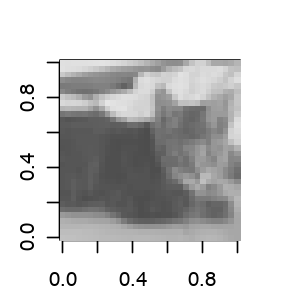

In [1031]:
img2 = matrix(unlist(x_train2[10,,,]), 32, 32, 3)

options(repr.plot.width=2.5, repr.plot.height=2.5)
par(pin=c(1.5, 1.5))

image(rotate(rotate(img2)), col=gray.colors(255))

In [1032]:
dim(x_train2[200,,,])

[1] 32 32  3

In [ ]:
# reshape
# dim(x_train2) <- c(nrow(x_train2), 2352)
# dim(x_test2) <- c(nrow(x_test2), 2352)

# 2. Models

## Multi-layer Perceptron

### MLP: Binary Classification

In [768]:
mlp_bc_model <- keras_model_sequential() 

mlp_bc_model %>%
  layer_dense(units = 8, activation = 'relu', input_shape = c(8)) %>% 

  layer_dense(units = 32, activation = 'relu') %>%
  layer_dropout(rate = 0.15) %>%

  layer_dense(units = 3, activation='sigmoid')

mlp_bc_model %>% compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = c('accuracy'))

In [769]:
mlp_bc_history <- mlp_bc_model %>% fit(x_train4, y_train4_cat, epochs=120, batch_size=8, validation_split=0.2)

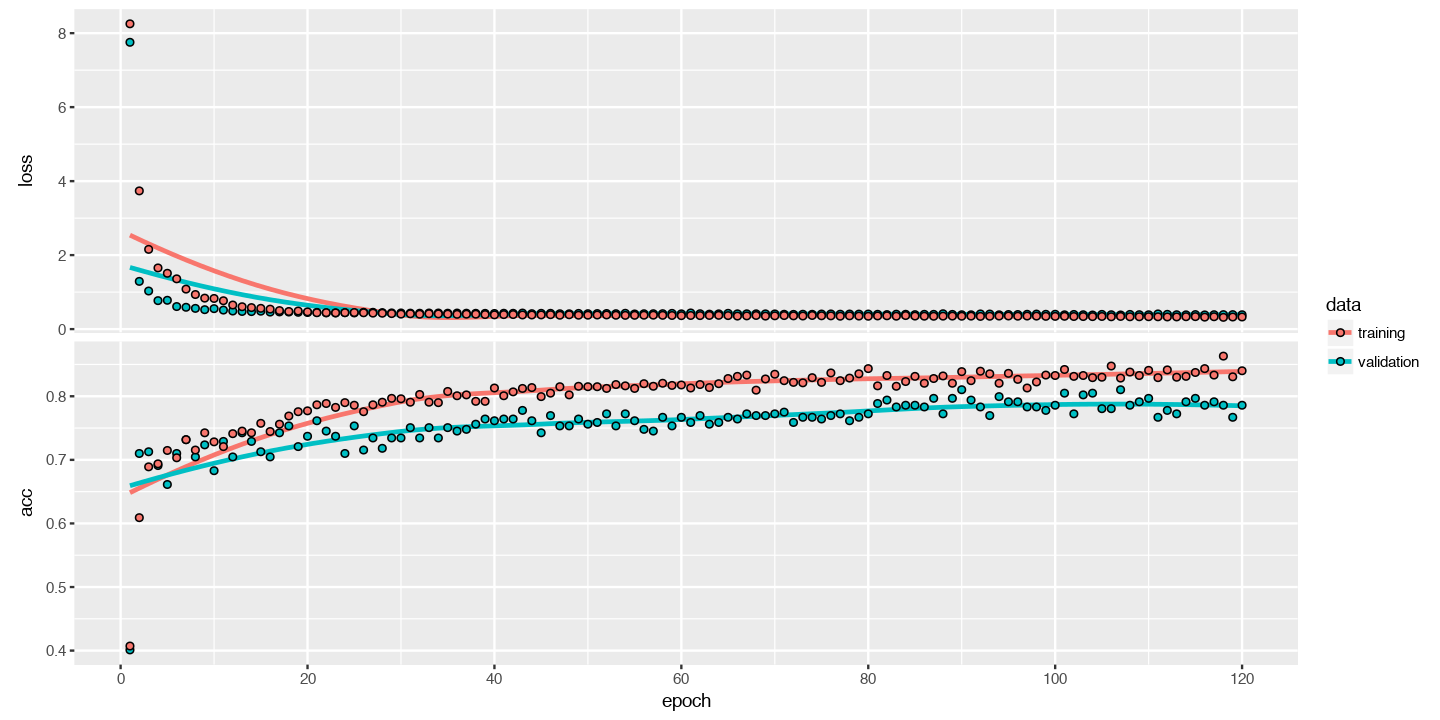

In [770]:
options(repr.plot.width=12, repr.plot.height=6)
par(pin=c(12, 12))
    
plot(mlp_bc_history)

In [771]:
mlp_bc_loss_and_metrics <- mlp_bc_model %>% evaluate(x_test4, y_test4_cat)
mlp_bc_loss_and_metrics

[[1]]
[1] 0.3993166

[[2]]
[1] 0.8257081

In [772]:
y_test4_predict <- mlp_bc_model %>% predict_classes(x_test4)

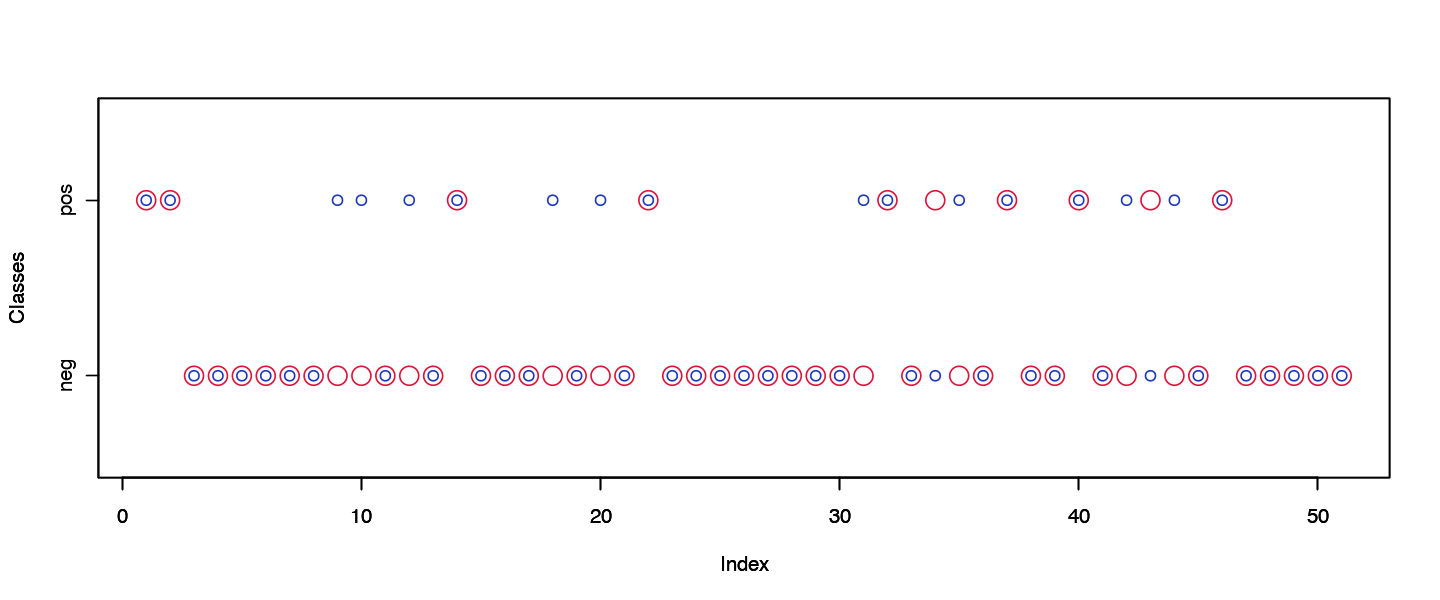

In [773]:
plot(y_test4_predict[50:100], col=crimson, cex=2, xlab="Index", ylab="Classes", yaxt="n", ylim=c(0.5, 2.5))
options(repr.plot.width=12, repr.plot.height=5)
par(new=TRUE)
plot(y_test4[50:100], col=persian_blue, xlab="Index", ylab="Classes", yaxt="n", ylim=c(0.5, 2.5))
axis(2, at=c(0, 1, 2, 3), labels=c("", "neg", "pos", ""))

### MLP: Multi-Class Classification

In [21]:
mlp_mc_model <- keras_model_sequential() 

mlp_mc_model %>% 
  layer_dense(units = 196, activation = 'relu', input_shape = c(784)) %>% 
  layer_dropout(rate = 0.5) %>%

  layer_dense(units = 784, activation = 'relu') %>%
  layer_dropout(rate = 0.5) %>%

  layer_dense(units = 10, activation = 'softmax')

mlp_mc_model %>% compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = c('accuracy'))

In [22]:
summary(mlp_mc_model)

Model
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
dense_1 (Dense)                     (None, 196)                     153860      
________________________________________________________________________________
dropout_1 (Dropout)                 (None, 196)                     0           
________________________________________________________________________________
dense_2 (Dense)                     (None, 784)                     154448      
________________________________________________________________________________
dropout_2 (Dropout)                 (None, 784)                     0           
________________________________________________________________________________
dense_3 (Dense)                     (None, 10)                      7850        
Total params: 316,158
Trainable params: 316,158
Non-trainable params: 0
_______________________________

In [23]:
mlp_mc_history <- mlp_mc_model %>% fit(x_train, y_train, epochs = 30, batch_size = 128, validation_split = 0.2)

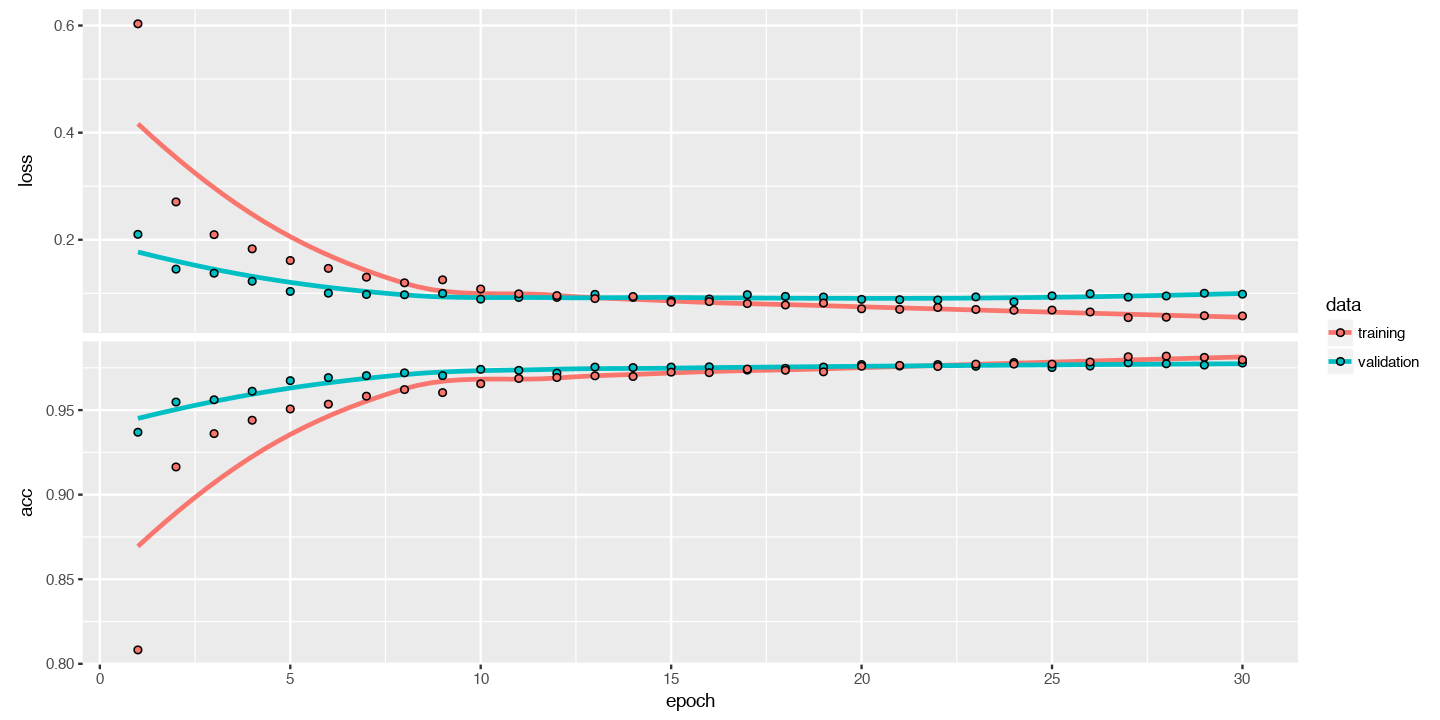

In [24]:
options(repr.plot.width=12, repr.plot.height=6)
par(pin=c(12, 12))
    
plot(mlp_mc_history)

In [27]:
mlp_mc_loss_and_metrics <- mlp_mc_model %>% evaluate(x_test, y_test)
mlp_mc_loss_and_metrics

[[1]]
[1] 0.09801542

[[2]]
[1] 0.9772511

In [28]:
y_test_predict <- mlp_mc_model %>% predict_classes(x_test)

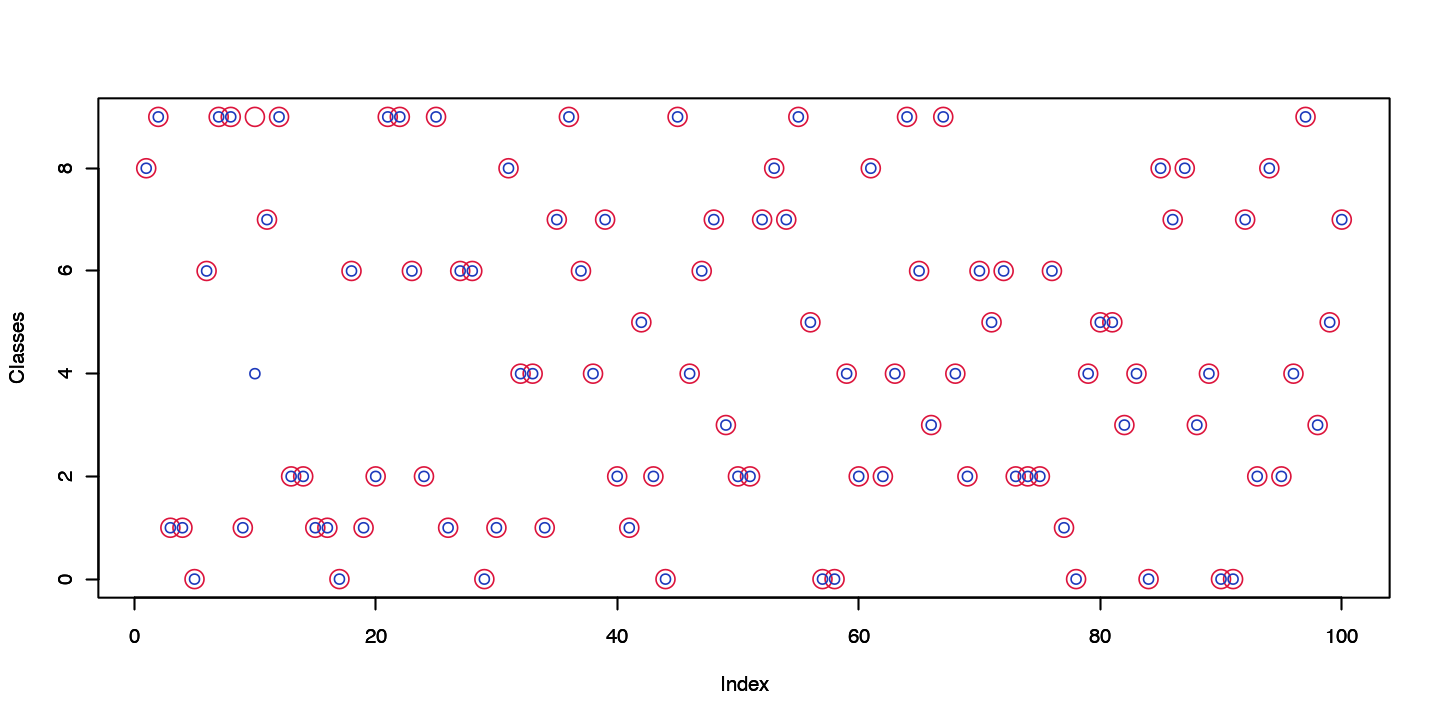

In [29]:
plot(y_test_predict[1:100], col=crimson, cex=2, xlab="Index", ylab="Classes")
options(repr.plot.width=12, repr.plot.height=6)
par(new=TRUE)
plot(y_test_labels[1:100], col=persian_blue, xlab="Index", ylab="Classes")

In [60]:
save_model_hdf5(mlp_mc_model, 'r_mlp_mc_model.hdf5')

### MLP: Regression

In [32]:
mlp_reg_model <- keras_model_sequential() 

mlp_reg_model %>%
  layer_dense(units = 13, activation = 'relu', input_shape = c(13)) %>%

  layer_dense(units = 104, activation = 'relu') %>%
  layer_dense(units = 416, activation = 'relu') %>%

  layer_dropout(rate = 0.1) %>%

  layer_dense(units = 1)

mlp_reg_model %>% compile(loss = 'mse', optimizer = 'nadam', metrics = c('mae'))

In [33]:
mlp_reg_history <- mlp_reg_model %>% fit(x_train5, y_train5, epochs=120, batch_size=4, validation_split=0.2)

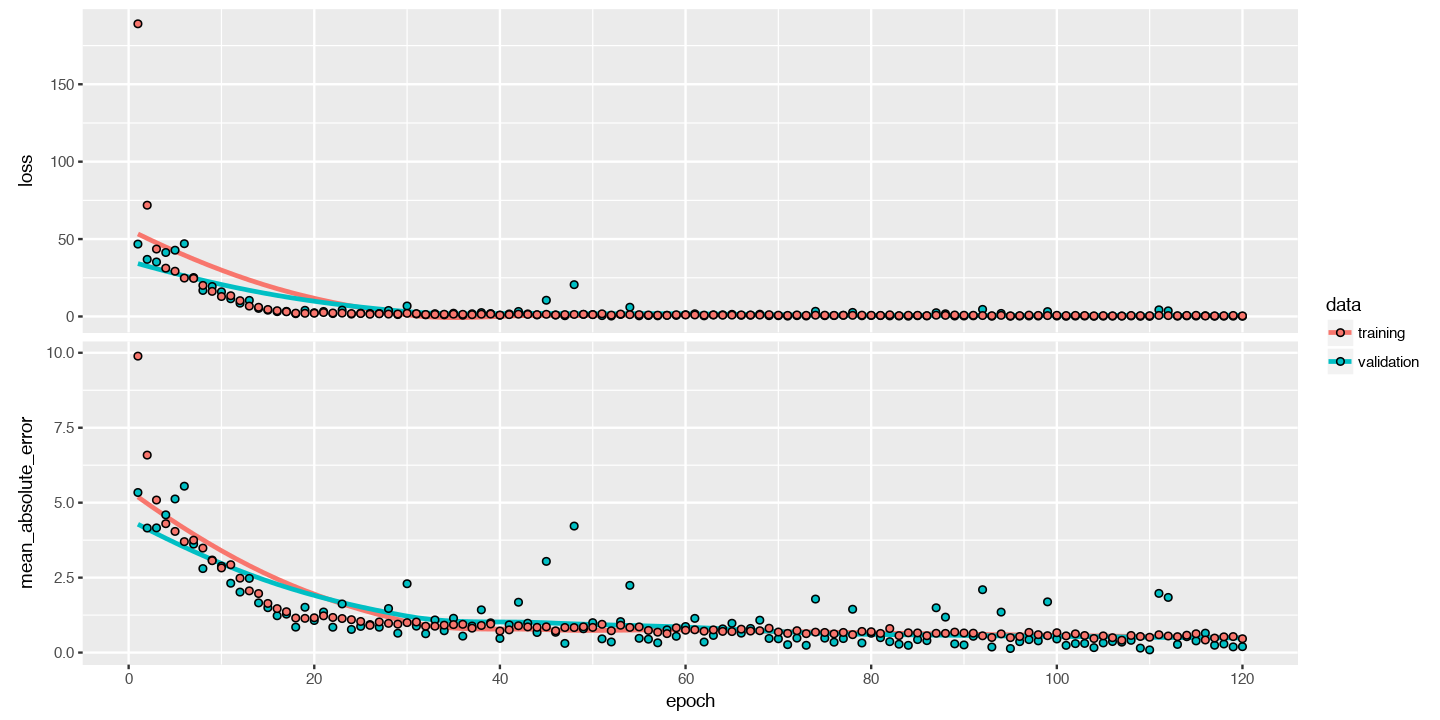

In [34]:
options(repr.plot.width=12, repr.plot.height=6)
par(pin=c(12, 12))
    
plot(mlp_reg_history)

In [35]:
mlp_reg_loss_and_metrics <- mlp_reg_model %>% evaluate(x_test5, y_test5)
mlp_reg_loss_and_metrics

[[1]]
[1] 0.03309524

[[2]]
[1] 0.156635

In [36]:
y_test5_predict <- mlp_reg_model %>% predict(x_test5)

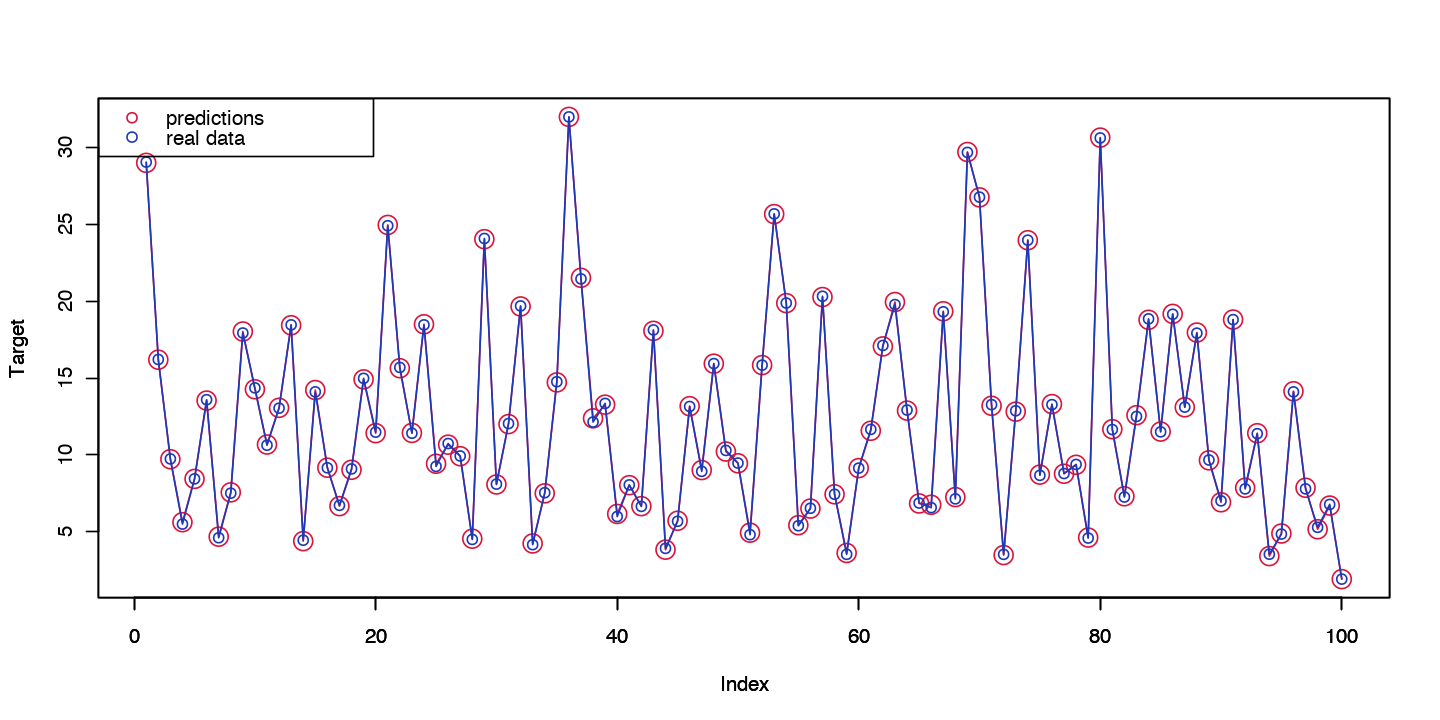

In [429]:
plot(y_test5_predict[1:100], type="o", col=crimson, cex=2, xlab="Index", ylab="Target", yaxt="n")
options(repr.plot.width=12, repr.plot.height=6)
par(new=TRUE)
plot(y_test5[1:100], type="o", col=persian_blue, xlab="Index", ylab="Target")
legend("topleft", legend = c("predictions ", "real data"), col=c(crimson, persian_blue), pch=1)

## Convolutional Neural Network (CNN)

### CNN: Binary Classification

In [401]:
# reshape
dim(x_train4) <- c(nrow(x_train4), 8, 1)
dim(x_test4) <- c(nrow(x_test4), 8, 1)

dim(y_train4_cat) <- c(nrow(y_train4_cat), 3, 1)
dim(y_test4_cat) <- c(nrow(y_test4_cat), 3, 1)

In [400]:
cnn_bc_model <- keras_model_sequential()

cnn_bc_model %>%
  layer_conv_1d(filter=32, kernel_size=5, padding="same", input_shape=c(8,1)) %>%
  layer_activation("relu") %>%
  
  layer_conv_1d(filter=32, kernel_size=3) %>%
  layer_activation("relu") %>%
  
  layer_max_pooling_1d(pool_size=2) %>%
  layer_dropout(0.2) %>%
  
  layer_dense(units=1, activation='sigmoid')
  
cnn_bc_model %>% compile(loss='binary_crossentropy', optimizer='nadam', metrics = c('accuracy')) 

In [402]:
cnn_bc_history <- cnn_bc_model %>% fit(x_train4, y_train4_cat, epochs=100, batch_size=8, validation_split=0.2)

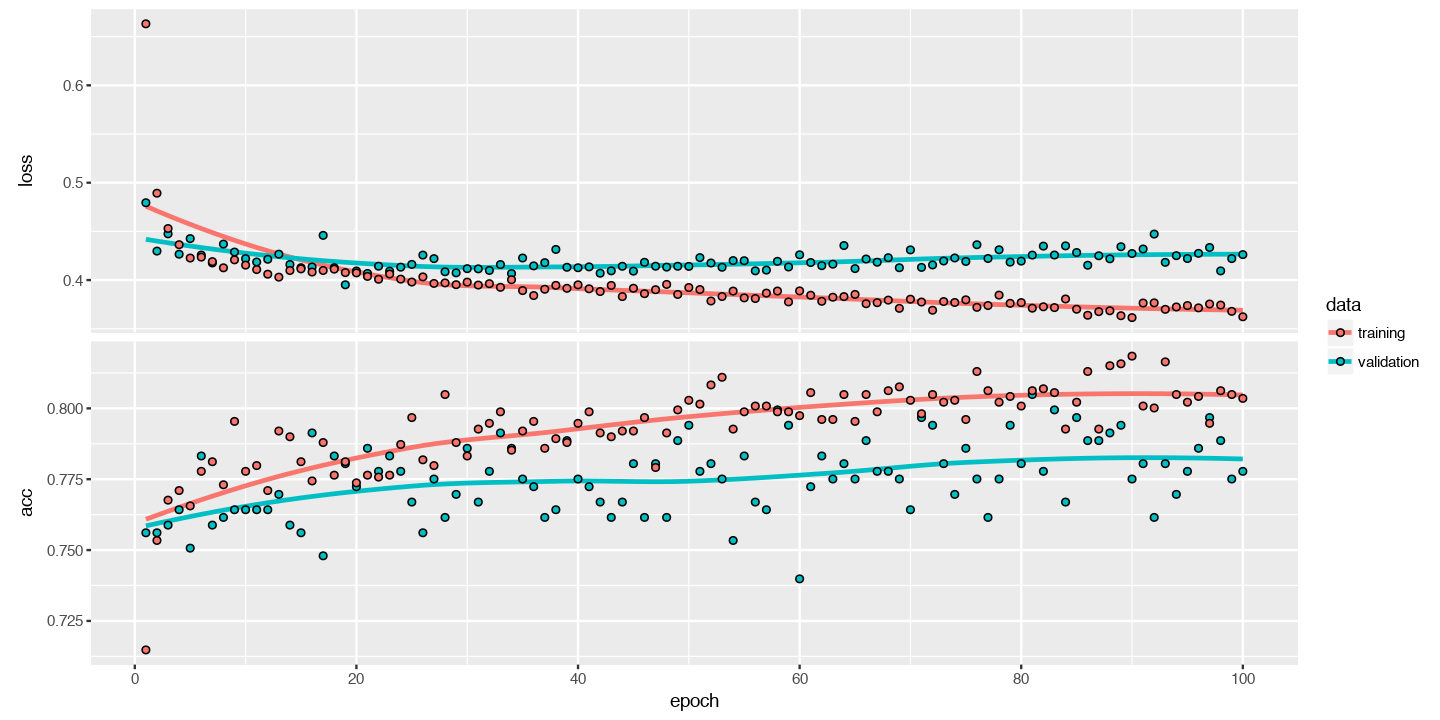

In [403]:
options(repr.plot.width=12, repr.plot.height=6)
par(pin=c(12, 12))
    
plot(cnn_bc_history)

In [404]:
cnn_bc_loss_and_metrics <- cnn_bc_model %>% evaluate(x_test4, y_test4_cat)
cnn_bc_loss_and_metrics

[[1]]
[1] 0.4425731

[[2]]
[1] 0.7625272

### CNN: Multi-Class Classification

In [529]:
# reshape
dim(x_train) <- c(nrow(x_train), 28, 28, 1)
dim(x_test) <- c(nrow(x_test), 28, 28, 1)

In [530]:
cnn_mc_model <- keras_model_sequential()

cnn_mc_model %>%
  layer_conv_2d(filter=28, kernel_size=c(3,3), padding="same", input_shape=c(28, 28, 1)) %>%
  layer_activation("relu") %>%
  
  layer_conv_2d(filter=28, kernel_size=c(3,3)) %>%
  layer_activation("relu") %>%

  layer_max_pooling_2d(pool_size=c(2,2)) %>%
  layer_dropout(0.2) %>%
  
  layer_conv_2d(filter=56, kernel_size=c(3,3), padding="same") %>%
  layer_activation("relu") %>%
  layer_conv_2d(filter=56, kernel_size=c(3,3)) %>%
  layer_activation("relu") %>%

  layer_max_pooling_2d(pool_size=c(2,2)) %>%
  layer_dropout(0.2) %>%
  
  layer_flatten() %>%

  layer_dense(224) %>%
  layer_activation("relu") %>%
  layer_dropout(0.4) %>%
  
  layer_dense(10) %>%
  layer_activation("softmax")
  
cnn_mc_model %>% compile(loss="categorical_crossentropy", optimizer="adam", metrics=c("accuracy"))

In [531]:
cnn_mc_history <- cnn_mc_model %>% fit(x_train, y_train, epochs=3, batch_size=128, validation_split=0.2)

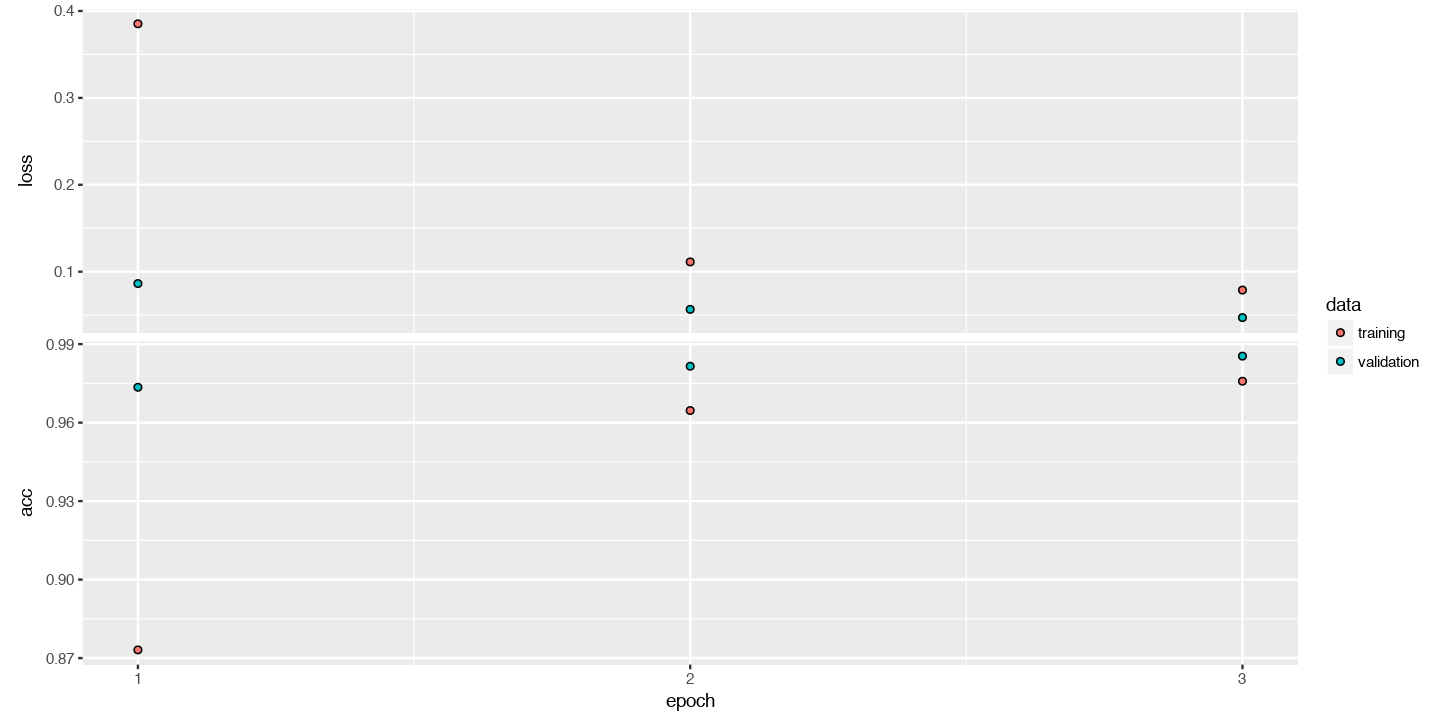

In [532]:
options(repr.plot.width=12, repr.plot.height=6)
par(pin=c(12, 12))
    
plot(cnn_mc_history)

In [534]:
cnn_mc_loss_and_metrics <- cnn_mc_model %>% evaluate(x_test, y_test)
cnn_mc_loss_and_metrics

[[1]]
[1] 0.04838376

[[2]]
[1] 0.9841591

In [535]:
y_test_cnn_predict <- cnn_mc_model %>% predict_classes(x_test)

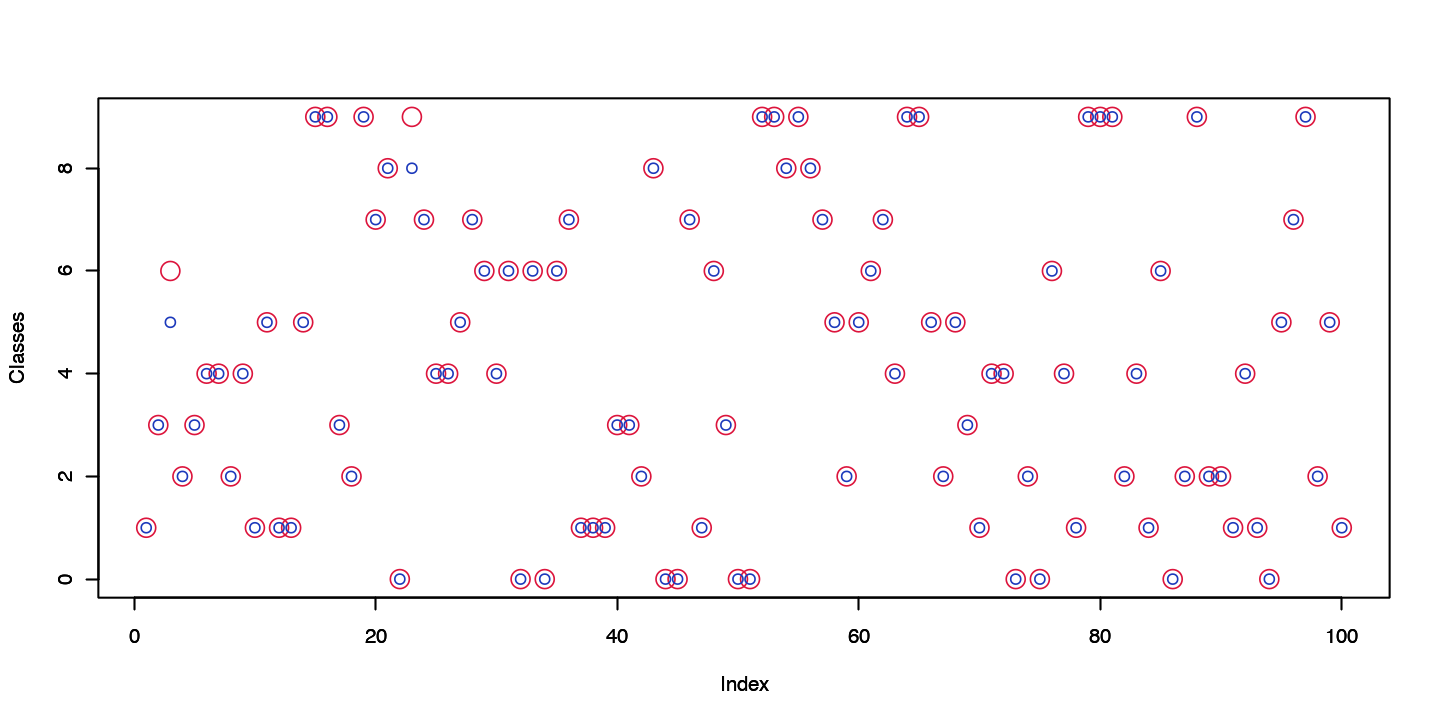

In [536]:
plot(y_test_cnn_predict[1:100], col=crimson, cex=2, xlab="Index", ylab="Classes")
options(repr.plot.width=12, repr.plot.height=6)
par(new=TRUE)
plot(y_test_labels[1:100], col=persian_blue, xlab="Index", ylab="Classes")

### CNN: Regression

In [494]:
# reshape
dim(x_train5) <- c(nrow(x_train5), 13, 1)
dim(x_test5) <- c(nrow(x_test5), 13, 1)

dim(y_train5) <- c(nrow(y_train5), 1, 1)
dim(y_test5) <- c(nrow(y_test5), 1, 1)

In [518]:
cnn_reg_model <- keras_model_sequential()

cnn_reg_model %>%
  layer_conv_1d(filter=13, kernel_size=5, padding = "valid", input_shape=c(13,1)) %>%
  layer_activation("relu") %>%
  
  layer_max_pooling_1d(pool_size=2) %>%
  layer_dropout(0.1) %>%
  
  layer_conv_1d(filter=104, kernel_size=3, padding = "valid") %>%
  layer_activation("relu") %>%
  
  layer_max_pooling_1d(pool_size=2) %>%
  layer_dropout(0.1) %>%
  
  layer_dense(units=416) %>%
  layer_activation("relu") %>%
  layer_dropout(0.2) %>%
  
  layer_dense(units=1)
  
cnn_reg_model %>% compile(loss = 'mse', optimizer = 'nadam', metrics = c('mae'))

In [519]:
cnn_reg_history <- cnn_reg_model %>% fit(x_train5, y_train5, epochs=800, batch_size=13, validation_split=0.2)

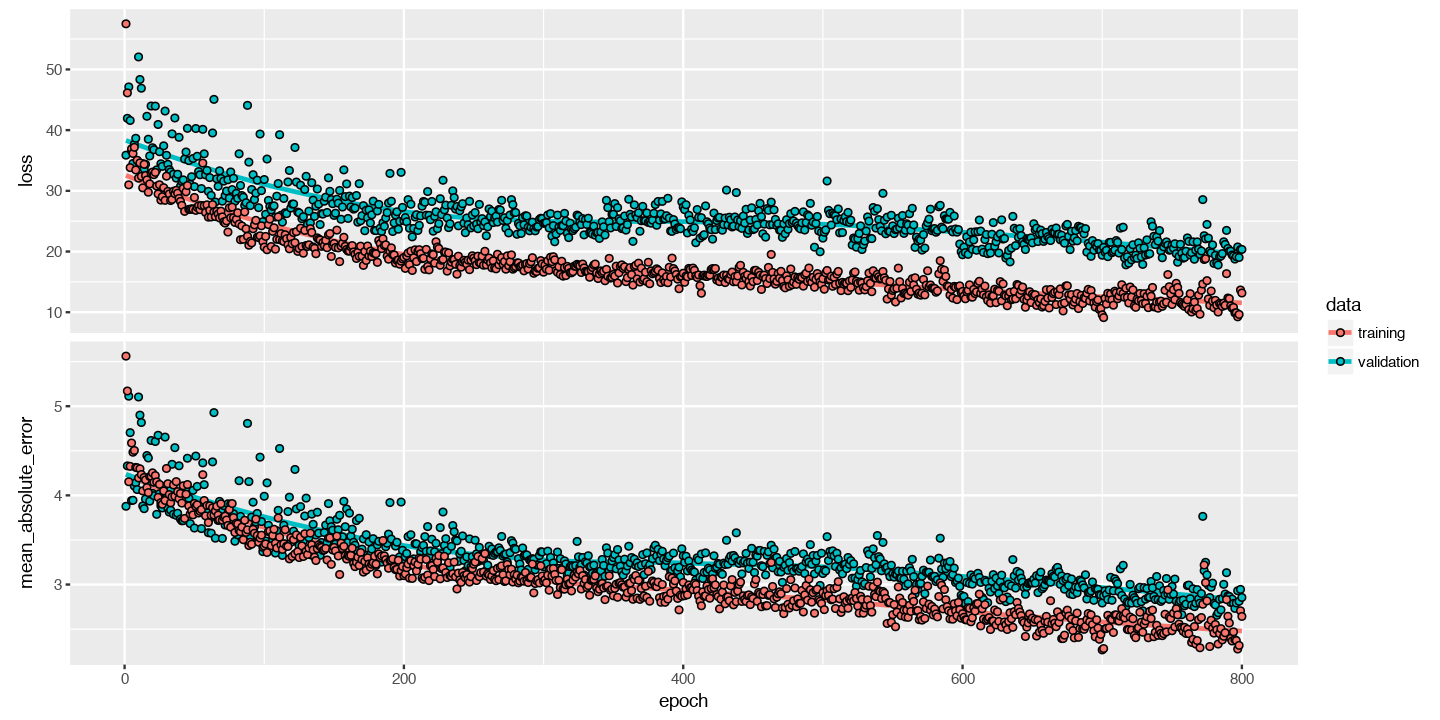

In [520]:
options(repr.plot.width=12, repr.plot.height=6)
par(pin=c(12, 12))
    
plot(cnn_reg_history)

In [521]:
cnn_reg_loss_and_metrics <-cnn_reg_model %>% evaluate(x_test5, y_test5)
cnn_reg_loss_and_metrics

[[1]]
[1] 11.70771

[[2]]
[1] 2.585421

In [522]:
y_test5_cnn_predict <- cnn_reg_model %>% predict(x_test5)

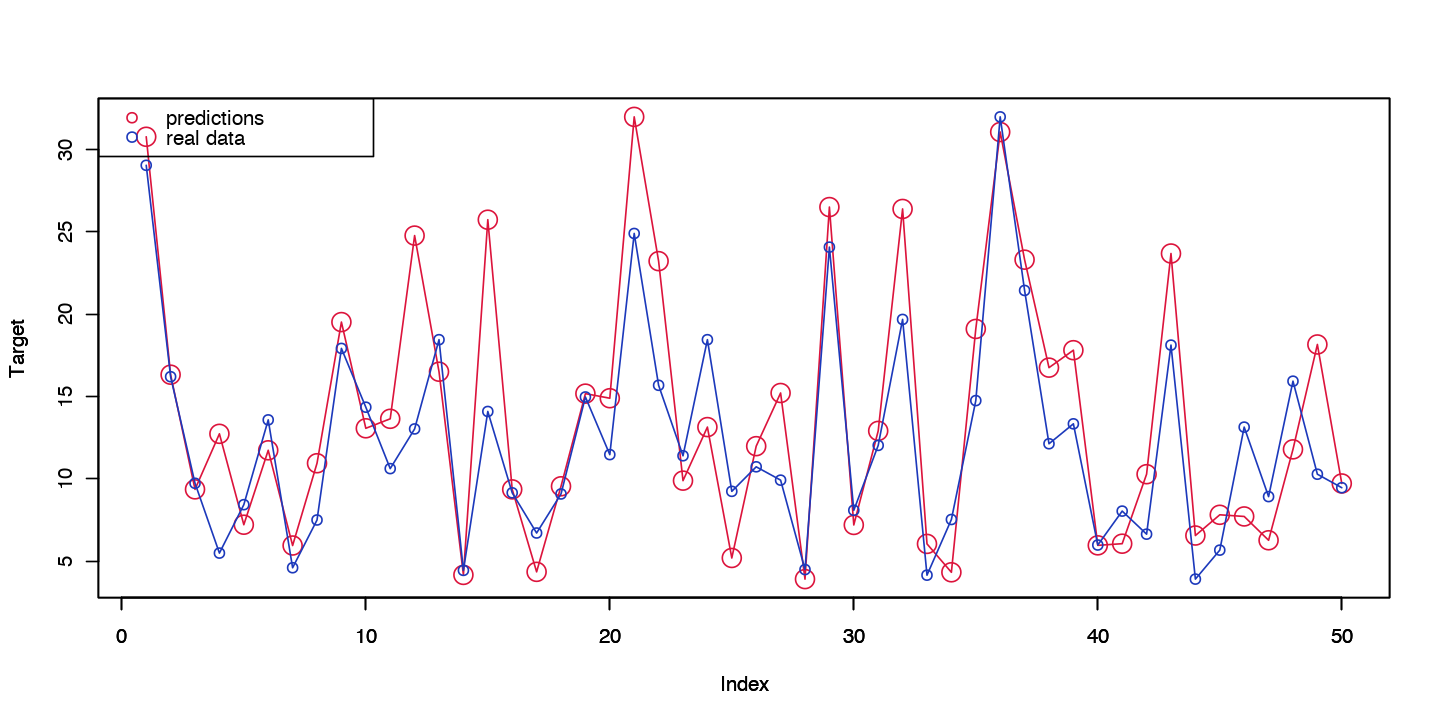

In [525]:
plot(y_test5_cnn_predict[0:50], type="o", col=crimson, cex=2, xlab="Index", ylab="Target", yaxt="n")
options(repr.plot.width=12, repr.plot.height=6)
par(new=TRUE)
plot(y_test5[0:50], type="o", col=persian_blue, xlab="Index", ylab="Target")
legend("topleft", legend = c("predictions ", "real data"), col=c(crimson, persian_blue), pch=1)

## Recurrent Neural Network (RNN)

### RNN: Binary Classification

In [ ]:
rnn_bc_model <- keras_model_sequential()

rnn_bc_model %>%


  layer_dense(units=1, activation='sigmoid')
  
rnn_bc_model %>% compile(loss='binary_crossentropy', optimizer='nadam', metrics = c('accuracy')) 

### RNN: Multi-Class Classification

In [ ]:
rnn_mc_model <- keras_model_sequential()

rnn_mc_model %>%

  layer_dense(10) %>%
  layer_activation("softmax")
  
rnn_mc_model %>% compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = c("accuracy"))

### RNN: Regression

In [ ]:
rnn_reg_model <- keras_model_sequential()

rnn_reg_model %>%


  layer_dense(units=1)
  
rnn_reg_model %>% compile(loss = 'mse', optimizer = 'rmsprop', metrics = c('mae'))